# Training

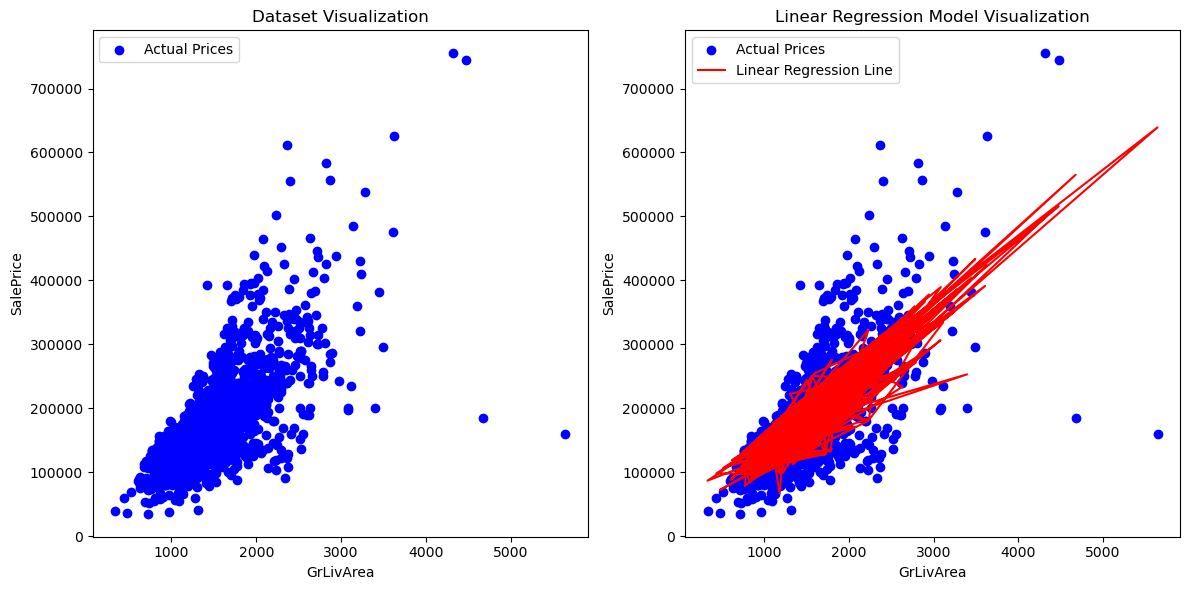

['linear_regression_model.joblib']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from joblib import dump

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Feature Selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Data Preprocessing
numeric_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
categorical_features = []  # Add categorical features if any

# Handling missing values for numeric features
numeric_imputer = SimpleImputer(strategy='mean')
train_data[numeric_features] = numeric_imputer.fit_transform(train_data[numeric_features])

# Handling missing values and encoding categorical features
if categorical_features:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    train_data[categorical_features] = categorical_imputer.fit_transform(train_data[categorical_features])
    train_data = pd.get_dummies(train_data, columns=categorical_features, drop_first=True)

# Feature Engineering
train_data['TotalBathrooms'] = train_data['FullBath'] + 0.5 * train_data['HalfBath']
features += ['TotalBathrooms']

# Split Data
X = train_data[features]
y = train_data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build and Train the Model
model = LinearRegression()
model.fit(X_scaled, y)

# Visualize the dataset
plt.figure(figsize=(12, 6))

# Scatter plot of the dataset
plt.subplot(1, 2, 1)
plt.scatter(X['GrLivArea'], y, color='blue', label='Actual Prices')
plt.title('Dataset Visualization')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()

# Visualize the linear regression line
plt.subplot(1, 2, 2)
plt.scatter(X['GrLivArea'], y, color='blue', label='Actual Prices')
plt.plot(X['GrLivArea'], model.predict(X_scaled), color='red', label='Linear Regression Line')
plt.title('Linear Regression Model Visualization')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()

plt.tight_layout()
plt.show()

# Save the trained model
dump(model, 'linear_regression_model.joblib')


For Testing Streamlit Interface is Provided